## МАШИННОЕ ОБУЧЕНИЕ на отзывах об отелях

In [1]:
import pandas as pd
import numpy as np

hotels = pd.read_csv('data/hotels.csv')
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [2]:
#object_columns = [s for s in data.columns if data[s].dtypes == 'object']

obj = []
num = []
for i in hotels.columns:
    if hotels[i].dtypes  == 'object':
        obj.append(i)
    else:
        num.append(i)
print(f'Столбцы "object":\n {obj}')
print()
print(f'Столбцы "numeric":\n {num}')
    


Столбцы "object":
 ['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'days_since_review']

Столбцы "numeric":
 ['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'lat', 'lng']


In [4]:
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [5]:
hotels['total_number_of_reviews'].min()

43

In [9]:
df = hotels.loc[hotels['total_number_of_reviews'] == 43]
print(df['review_date'].min())
print(df['review_date'].max())
#print(df['review_date'].max() - df['review_date'].min()) # можно узнать частоту отзывов за определенный период времени

1/5/2017
9/2/2015


### Знакомство с обучение модели

In [10]:
# подготавливаем dataFrame
# создаем dataFrame X_train и удалем из него целевой переменную reviewer_score
#X = hotels.drop(['reviewer_score'], axis=1) без удаления незначимы признаков см. ниже графики
X = hotels.drop(['reviewer_score',
                 'total_number_of_reviews_reviewer_has_given',
                 'total_number_of_reviews',
                 'additional_number_of_scoring',
                 'lat',
                 'lng'],
                axis=1) # удаляем незначимые признаки см. графики ниже

X.drop(labels=obj, axis=1, inplace=True) # удалим все столбцы типа object по списку "obj" список создан выше
X.fillna(value=X.median(), inplace=True) # заполним пропуски средним значением соответствующего столбца

# создадим dataFrame, который состоит из одной переменной - столбца (Series) и в дальнейшем будем сравнивать с ним предсказания
y = hotels['reviewer_score']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 3 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   average_score                      386803 non-null  float64
 1   review_total_negative_word_counts  386803 non-null  int64  
 2   review_total_positive_word_counts  386803 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 8.9 MB


In [11]:
# разбиваем дата фрейм на train и test
# загрузка библиотеки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(f'X_train: {X_train.shape}', f'y_train: {y_train.shape}', f'X_test: {X_test.shape}', f'y_test: {y_test.shape}')

'X_train: (290102, 3)'

'y_train: (290102,)'

'X_test: (96701, 3)'

'y_test: (96701,)'

### Создаем и обучаем модель

In [69]:
# загружаем библиотеки
from sklearn.ensemble import RandomForestRegressor # создает и обучает модель
from sklearn import metrics # оценивает точность модели

# создаем модель и записываем ее в переменную
regr = RandomForestRegressor(n_estimators=100)

# обучаем модель на тренировочных данных
regr.fit(X_train, y_train)

# проверяем модель на тестовой выборке и результат запишем в переменную y_pred
y_pred = regr.predict(X_test)

In [49]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.

print("Mape: ", metrics.mean_absolute_percentage_error(y_test, y_pred))

Mape:  0.1413737640936891


In [70]:
print("Mape: ", metrics.mean_absolute_percentage_error(y_test, y_pred)) # показатели после удаления неинформативных признаков

Mape:  0.14226016149001458


### Отбор признаков

In [64]:
# Оцениваем значимость каждого признака для обучения модели
# разделим их на два типа: неприрывные и категориальные

# категориальные признаки
cat_cols = ['average_score', 'lat']

# непрерывные признаки
num_cols = ['total_number_of_reviews',
            'review_total_negative_word_counts',
            'additional_number_of_scoring',
            'review_total_positive_word_counts',
            'total_number_of_reviews_reviewer_has_given']

In [59]:
X.head(1)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng
0,581,8.4,3,1994,4,7,51.507894,-0.143671


In [56]:
y=y.astype('int')
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 386803 entries, 0 to 386802
Series name: reviewer_score
Non-Null Count   Dtype
--------------   -----
386803 non-null  int32
dtypes: int32(1)
memory usage: 1.5 MB


<AxesSubplot:>

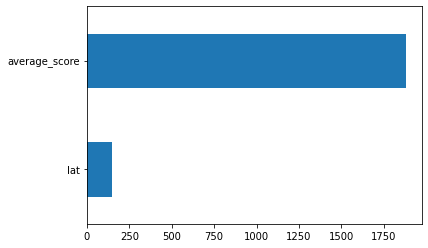

In [65]:
# через Хи-квадрат (непараметрически признак - рейтинги, места в таблице) посмотрим p-value для каждого признака

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

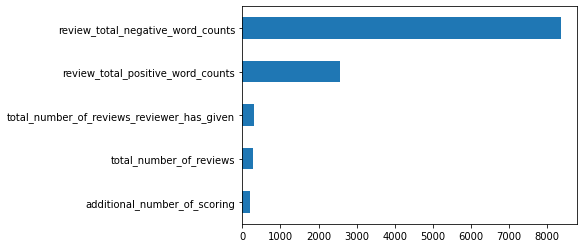

In [66]:
# Для оценки значимости непрерывных переменных (количественные - рост, вес кол-во букв, кол-во отзывов) будем использовать функцию f_classif из библиотеки sklearn.
# В основе метода оценки значимости переменных лежит изученный вами в юнитах по статистике анализ (ANOVA).
# Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t)

from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

После исследования значимости признаков удалим незначимые признаки и проведем еще раз обучение модели. См выше, где обучение модели.

### Самопроверка

In [7]:
# Задание 4.2 Сколько уникальных названий отелей представлено в наборе данных?
hotels['hotel_name'].nunique()

1492

In [8]:
# Задание 4.3 Когда был оставлен самые первый и последний отзывы? Введите ответ в формате yyyy-mm-dd
df_data = hotels.copy()
df_data['data'] = pd.to_datetime(df_data['review_date'])
print(df_data['data'].max())
print(df_data['data'].min())
#df_data.info()

2017-08-03 00:00:00
2015-08-04 00:00:00


In [19]:
# Задание 4.4 Сколько уникальных тегов представлено в наборе данных?

df_tags = hotels.copy()
df_tags['tags_cnt'] = df_tags['tags'].apply(lambda x: x.split(','))
print(df_tags['tags_cnt'][1])
print(type(df_tags['tags_cnt'][1]))

["[' Business trip '", " ' Couple '", " ' Standard Double Room '", " ' Stayed 1 night ']"]
<class 'list'>


In [21]:
# Функция ез ячейки извлекает строку и формирует новый SEries каждое слово строки отдельное значение в клетке
import ast

a = df_tags.copy()
b = a['tags'].apply(lambda x: ast.literal_eval(x))
b = b.explode(ignore_index=True)

type(b)

pandas.core.series.Series

In [22]:
b.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1767522 entries, 0 to 1767521
Series name: tags
Non-Null Count    Dtype 
--------------    ----- 
1767522 non-null  object
dtypes: object(1)
memory usage: 13.5+ MB


In [23]:
# Количество уникальных тегов
b.nunique() 

2368

In [15]:
# функция столбец превращает в многоуровневый список, дальше обработка циклами и т.д. что бы сделать одномерный, не доделано
x = df_tags['tags_cnt'].tolist()
b = x[0]
type(b)

list

In [31]:
b.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1767522 entries, 0 to 1767521
Series name: tags
Non-Null Count    Dtype 
--------------    ----- 
1767522 non-null  object
dtypes: object(1)
memory usage: 13.5+ MB


In [18]:
import collections
z = collections.Counter(b)
print(z)

Counter({"[' Leisure trip '": 1, " ' Couple '": 1, " ' Studio Suite '": 1, " ' Stayed 2 nights '": 1, " ' Submitted from a mobile device ']": 1})


In [14]:
# задние 4.5 Какой тег представлен в наибольшем числе отзывов?

b.mode()

0     Leisure trip 
Name: tags, dtype: object

In [24]:
# задание 4.6  Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях

b.value_counts().nlargest(n=10) # возвращаем десятку cамых популярных тегов, т.е. имеющие самое большое кол-во вхождений

 Leisure trip                       313593
 Submitted from a mobile device     230778
 Couple                             189212
 Stayed 1 night                     145373
 Stayed 2 nights                    100263
 Solo traveler                       81235
 Stayed 3 nights                     72000
 Business trip                       61989
 Group                               49088
 Family with young children          45836
Name: tags, dtype: int64

In [30]:
hotels.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [28]:
hotels['days_since_review'].min()

'0 days'